In [51]:
pip install seaborn



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt


In [53]:
pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

In [55]:
df = pd.read_csv('/Users/zahranazemian/Desktop/Python/laptops.csv')
df.head(5)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [56]:
X = df[['CPU_frequency']]  # Independent variable
y = df['Price']           # Dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients
print("Intercept (β0):", model.intercept_)
print("Slope (β1):", model.coef_[0])
Ydat = model.predict(X)
# Predict using the model
CPU_frequency_example = [[2]]  # Example: 3 GHz
predicted_price = model.predict(CPU_frequency_example)
intercept = model.intercept_
slope = model.coef_[0]
# Write the equation
print(f"The linear equation is: Price = {intercept:.2f} + {slope:.2f} * CPU_frequency")
print("Predicted Price for CPU_frequency = 2:", predicted_price[0])

Intercept (β0): 253.66117068581912
Slope (β1): 512.1357332682483
The linear equation is: Price = 253.66 + 512.14 * CPU_frequency
Predicted Price for CPU_frequency = 2: 1277.9326372223156


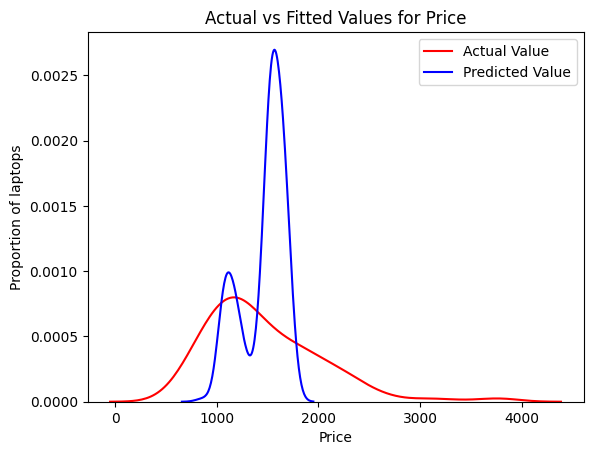

In [57]:
# Write your code below and press Shift+Enter to execute 
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Ydat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()


In [58]:
mse_slr = mean_squared_error(df['Price'], Ydat)
r2_score_slr = model.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)


The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629


In [59]:
pip install scipy


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [60]:
import scipy
from scipy.stats import pearsonr

# Assuming df is your DataFrame
target_column = 'Price'
results = []

# Iterate through all numeric columns except the target column
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if col != target_column:
        # Calculate Pearson correlation and p-value
        pearson_coef, p_value = pearsonr(df[col], df[target_column])
        results.append({'Column': col, 'P-Value': p_value, 'Pearson Coef': pearson_coef})

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Sort by P-Value in ascending order to find the lowest
results_df = results_df.sort_values(by='P-Value', ascending=True)

print(results_df)

           Column       P-Value  Pearson Coef
7          RAM_GB  3.681561e-20      0.549297
4        CPU_core  7.912950e-14      0.459398
6   CPU_frequency  5.502463e-09      0.366666
0      Unnamed: 0  3.851058e-07      0.321933
2             GPU  6.166950e-06      0.288298
1        Category  7.225696e-06      0.286243
8  Storage_GB_SSD  1.489892e-04      0.243421
3              OS  5.696643e-04     -0.221730
5  Screen_Size_cm           NaN           NaN
9       Weight_kg           NaN           NaN


In [61]:
X = df[['RAM_GB']]  # Independent variable
y = df['Price']           # Dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)
Ydat1 = model.predict(X)
# Print the coefficients
print("Intercept (β0):", model.intercept_)
print("Slope (β1):", model.coef_[0])

# Predict using the model
RAM_GB_example = [[8]]  # Example: 3 GHz
predicted_price = model.predict(RAM_GB_example)
intercept = model.intercept_
slope = model.coef_[0]
# Write the equation
print(f"The linear equation is: Price = {intercept:.2f} + {slope:.2f} * RAM_GB")
print("Predicted Price for CPU_frequency = 8:", predicted_price[0])

Intercept (β0): 460.20646170839393
Slope (β1): 127.13692010309289
The linear equation is: Price = 460.21 + 127.14 * RAM_GB
Predicted Price for CPU_frequency = 8: 1477.301822533137


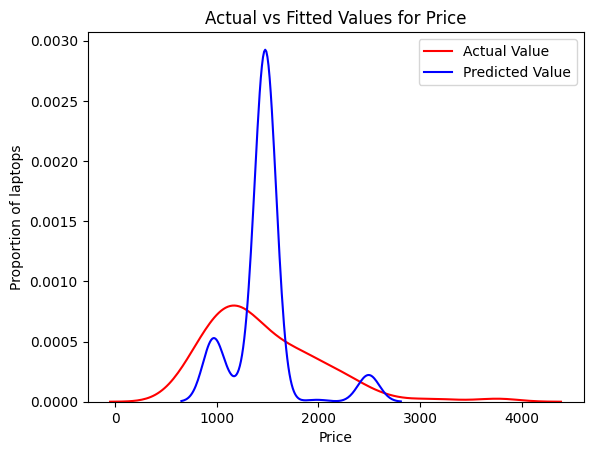

In [62]:
# Write your code below and press Shift+Enter to execute 
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Ydat1, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

In [ ]:
mse_slr = mean_squared_error(df['Price'], Ydat)
r2_score_slr = model.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)
